# COMP 432 PROJECT: Predicting the Colors of Squirrels of Central Park
By Vanessa Razon
<br/>Student ID: 40033699

<p>The main purpose of this project is to see if a machine learning model can be designed to predict an observed squirrel’s main color, and/or highlight color if any, given a location in New York’s Central Park, the date and the time of day. In terms of performance, the aim is to obtain a model that achieves a classification accuracy of at least 50%.</p>

In [1]:
# LOAD PACKAGES AND DATA
import pandas as pd                   
import numpy as np                    
import sklearn    
import sklearn. preprocessing       # For LabelEncoder class         
import sklearn.linear_model         # For LogisticRegression class        
import sklearn.model_selection      # For cross-validation class
import sklearn.metrics              # For accuracy_score class
import sklearn.neural_network       # For MLPClassifier class
import sklearn.svm                  # For SVC class 
import sklearn.ensemble             # For RandomForestClassifier class
import sklearn.tree                 # For DecisionTreeClassifier class
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

## Preprocessing the dataset


In [2]:
# Load the dataset
df = pd.read_csv('2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv')
df.shape # We see that there are currently 3023 data points and 31 columns

# Checking for any missing values in the features/labels that will be used in the project
# Features
print("Number of missing values:")
print("X coordinate: %i"%(df.shape[0]-df['X'].count()))
print("Y coordinate: %i"%(df.shape[0]-df['X'].count()))
print("Time of day: %i"%(df.shape[0]-df['Shift'].count()))
print("Date: %i"%(df.shape[0]-df['Date'].count()))
# Labels (note: since squirrels do not always have a highlight fur color, it is ok to have missing values for
# the highlight color)
print("Primary fur color: %i"%(df.shape[0]-df['Primary Fur Color'].count())) 

# Remove data points with missing values of primary fur color
df = df.dropna(subset=['Primary Fur Color'])
# Set missing highlight fur colors as 'None'
df['Highlight Fur Color'] = df['Highlight Fur Color'].fillna('None')
df.reset_index(drop=True, inplace=True)

Number of missing values:
X coordinate: 0
Y coordinate: 0
Time of day: 0
Date: 0
Primary fur color: 55


In [3]:
# Converting the features/labels into numpy arrays
from sklearn.preprocessing import LabelEncoder   

X_coor = np.array(df['X'])
Y_coor = np.array(df['Y'])
# Time of day: value 0 if shift=AM or 1 if shift=PM
time = np.array([0 if df['Shift'][i]=='AM' else 1 for i in range(df.shape[0])])
# Date: since the data was collected in the span of 2 weeks of October 2018, only the date 
# number will be used for the 'Date' feature
date = np.array([str(df['Date'][i])[2]+str(df['Date'][i])[3] for i in range(df.shape[0])], dtype='int32')

# Since the labels are expressed as categorical variables, categorical encoding will be done 

primary_LE = LabelEncoder()
pColor = primary_LE.fit_transform(df['Primary Fur Color'])

highlight_LE = LabelEncoder()
hColor = highlight_LE.fit_transform(df['Highlight Fur Color'])

## Plotting the data

Text(0, 0.5, 'Y coordinate')

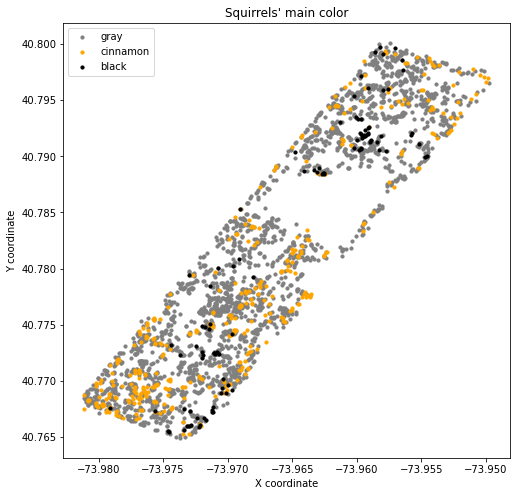

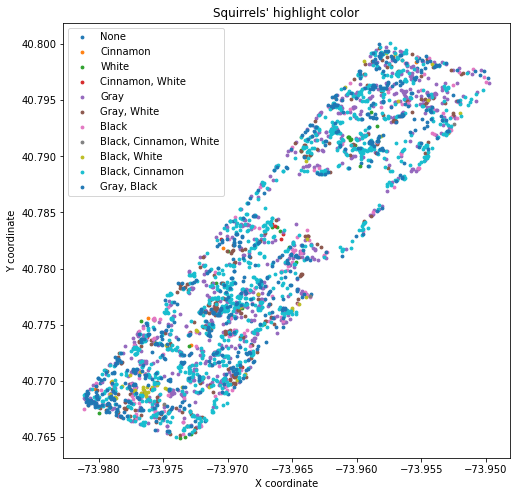

In [4]:
# Plot for primary fur color
plt.figure(figsize=(8,8))
coor = np.vstack((X_coor,Y_coor)).T
plt.scatter(*coor[pColor==2].T, c="gray", s=10, label="gray")
plt.scatter(*coor[pColor==1].T, c="orange", s=10, label="cinnamon")
plt.scatter(*coor[pColor==0].T, c="black", s=10, label="black")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.title("Squirrels' main color")
plt.legend()

# Plot for highlight fur color
plt.figure(figsize=(8,8))
color_labels = df['Highlight Fur Color'].value_counts().index.tolist()

for i in range(df["Highlight Fur Color"].nunique()):
    plt.scatter(*coor[hColor==i].T, s=8, label=color_labels[i])
plt.legend()
plt.title("Squirrels' highlight color")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")

## The models that will be used in this project: 

### Multiclass Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression

def MLR(predictors,labels,folds):
    """ Trains a multiclass logistic regression and performs k-fold cross-validation. 
    Expected output is a multiclass logistic regression model that has been trained using the given predictors and
    labels.
    
    Arguments
    ---------
    predictors: matrix(n_samples,n_features) of predictors to be used in the model
    labels: vector of squirrel's color of shape (n_samples, )
    folds: number of folds used in cross-validation
    
    Example
    -------
    >>>mlr_model = MLR(modelInput, labels,4)
    held-out accuracy (4-fold): 56.43256%
    >>>pColor_MLR
    LogisticRegression(max_iter=300, multi_class='multinomial', random_state=0, solver='newton-cg')
    
    """
    model = LogisticRegression(multi_class='multinomial', 
                               max_iter=300, solver='newton-cg', random_state=0).fit(predictors,labels)
    kFold_CV(model, predictors, labels,folds)
    return model

### Multilayer Perceptron

In [6]:
from sklearn.neural_network import MLPClassifier

def MLP(predictors,labels,folds):
    """ Trains a 4-layer multilayer perceptron and performs k-fold cross-validation. 
    Expected output is a MLP model that has been trained using the given predictors and
    labels.
    
    Arguments
    ---------
    predictors: matrix(n_samples,n_features) of predictors to be used in the model
    labels: vector of squirrel's color of shape (n_samples, )
    folds: number of folds used in cross-validation
    
    Example
    -------
    >>>mlp_model = MLP(modelInput, labels,10)
    held-out accuracy (10-fold): 83.73771%
    >>>mlp_model
    MLPClassifier(hidden_layer_sizes=(10,20,30,40), activation='relu', solver='adam', batch_size=100, max_iter=500,
                          learning_rate_init=0.01, random_state=0)
    """
    model = MLPClassifier(hidden_layer_sizes=(10,20,30,40), activation='relu', solver='adam', batch_size=100, max_iter=500,
                          learning_rate_init=0.01, random_state=0).fit(predictors,labels)
    kFold_CV(model, predictors, labels,folds)
    return model
    

### Support Vector Machine

In [7]:
from sklearn.svm import SVC

def SVM(predictors,labels,folds):
    """ Trains a support vector machine and performs k-fold cross-validation. 
    Expected output is a SVM model that has been trained using the given predictors and
    labels.
    
    Arguments
    ---------
    predictors: matrix(n_samples,n_features) of predictors to be used in the model
    labels: vector of squirrel's color of shape (n_samples, )
    folds: number of folds used in cross-validation
    
    Example
    -------
    >>>svm_model = SVM(modelInput, labels,5)
    held-out accuracy (5-fold): 43.43242%
    >>>svm_model
    SVC(kernel='rbf', degree=3)
    """
    model = SVC(kernel='rbf', degree=3).fit(predictors, labels)
    kFold_CV(model, predictors, labels,folds)
    return model


### Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

def DTC(predictors, labels, folds):
    """ Trains a decision tree classifier and performs k-fold cross-validation. 
    Expected output is a decision tree model that has been trained using the given predictors and
    labels.
    
    Arguments
    ---------
    predictors: matrix(n_samples,n_features) of predictors to be used in the model
    labels: vector of squirrel's color of shape (n_samples, )
    folds: number of folds used in cross-validation
    
    Example
    -------
    >>>dtc_model = DTC(modelInput, labels,3)
    held-out accuracy (3-fold): 76.58356%
    >>>dtc_model
    DecisionTreeClassifier(random_state=0)
    """
    model = DecisionTreeClassifier(random_state=0).fit(predictors, labels)
    kFold_CV(model, predictors, labels,folds)
    return model

### Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

def RF(predictors, labels, folds):
    """ Trains a random forest and performs k-fold cross-validation. 
    Expected output is a random forest that has been trained using the given predictors and
    labels.
    
    Arguments
    ---------
    predictors: matrix(n_samples,n_features) of predictors to be used in the model
    labels: vector of squirrel's color of shape (n_samples, )
    folds: number of folds used in cross-validation
    
    Example
    -------
    >>>pColor_RF = RF(modelInput, labels,4)
    held-out accuracy (4-fold): 86.43241%
    >>>pColor_RF
    RandomForestClassifier(random_state=0)
    """
    model = RandomForestClassifier(n_estimators=100, random_state=0).fit(predictors,labels)
    kFold_CV(model, predictors, labels,folds)
    return model

### Other useful fuctions

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

def kFold_CV(model, X_train, y_train,folds=10):
    """ Performs k-fold cross-validation using classification error. It also prints and returns the held-out accuracy
    
    Arguments
    ---------
    model: model that will be used for cross-validation 
    X_train: array of predictors of shape (n_samples, n_features)
    y_train: array of labels of shape (n_samples, )
    folds: int number of folds used in cross-validation
    
    Example
    -------
    >>>kFoldCV(mlp, predictors, labels, 5)
    Accuracy of model on training set by %d-fold cross-validation: 54.42314%
    """
    scores = cross_val_score(model, X_train, y_train, cv=folds, scoring='accuracy',)
    print("Accuracy of model on training set by %d-fold cross-validation: %.5f%%"%(folds,scores.mean()*100))
    return scores.mean()*100
    
def test_accuracy(model, X_test, y_test):
    """ Computes classification accuracy on test set. This accuracy is printed and returned by the function
    
    
    Arguments
    ---------
    model: model that will be used for testing
    X_test: array of predictors of shape (n_samples, n_features)
    y_test: array of labels of shape (n_samples, )
    
    Example
    -------
    >>>testAcc(model, X_test, y_test)
    Accuracy of model on test set: 42.43241%
    
    """
    pred = model.predict(X_test)
    print("Accuracy of model on test set: %.5f%%" %(accuracy_score(y_test, pred)*100))
    return accuracy_score(y_test, pred)*100

## Predicting primary fur color
The same training and test sets are used for the 5 different models.

In [11]:
from sklearn.model_selection import train_test_split

model_input = np.column_stack((X_coor,Y_coor,time,date))
X_train, X_test, y_train, y_test = train_test_split(model_input,pColor, test_size=0.25, random_state=0) 

print("PRIMARY COLOR PREDICTION")

print("\nMLR")
# Multiclass Logistic Regression
pColor_MLR= MLR(X_train, y_train,4)
test_accuracy(pColor_MLR, X_test, y_test)

print("\nMLP")
# Multi-layer perceptron
pColor_MLP = MLP(X_train, y_train,4)
test_accuracy(pColor_MLP, X_test, y_test)

print("\nSVM")
# Support-vector machine
pColor_SVM = SVM(X_train, y_train,4)
test_accuracy(pColor_SVM, X_test, y_test)

print("\nDecision tree")
# Decision tree
pColor_DTC = DTC(X_train, y_train,4)
test_accuracy(pColor_DTC, X_test, y_test)

print("\nRandom Forest")
# Random Forest
pColor_RF = SVM(X_train, y_train,4)
test_accuracy(pColor_RF, X_test, y_test);

PRIMARY COLOR PREDICTION

MLR
Accuracy of model on training set by 4-fold cross-validation: 83.73771%
Accuracy of model on test set: 82.07547%

MLP
Accuracy of model on training set by 4-fold cross-validation: 83.73771%
Accuracy of model on test set: 82.07547%

SVM
Accuracy of model on training set by 4-fold cross-validation: 83.73771%
Accuracy of model on test set: 82.07547%

Decision tree
Accuracy of model on training set by 4-fold cross-validation: 78.61601%
Accuracy of model on test set: 75.33693%

Random Forest
Accuracy of model on training set by 4-fold cross-validation: 83.73771%
Accuracy of model on test set: 82.07547%


We see that the all the models, except the Decision tree, obtain the same accuracy on the test set. But why?
<p><b>NOTE</b>: attempts have been made to get different accuracy results by playing with the models' parameters (solver, hidden_layer_sizes, etc) but the same results are still obtained</p>

In [12]:
# Looking at the different predictions

print(pColor_MLR.predict(X_test))
print(primary_LE.inverse_transform([2]))  
# It seems like the Multiclass Logistic Regression's output is always 2 (which corresponds to 'Gray')

np.all(primary_LE.inverse_transform(pColor_MLR.predict(X_test)) == 'Gray')
# The Multiclass Logistic Regression is predicting that the sighted squirrel 
# will be gray no matter what the input is

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

True

In [13]:
# Checking if the other models get the same predictions

print("All MLP predictions are 'Gray'? " + str(np.array_equiv(pColor_MLR.predict(X_test), pColor_MLP.predict(X_test))))
print("All SVM predictions are 'Gray'? " + str(np.array_equiv(pColor_MLR.predict(X_test), pColor_SVM.predict(X_test))))
print("All Random Forest predictions are 'Gray'? " + str(np.array_equiv(pColor_MLR.predict(X_test), pColor_RF.predict(X_test))))
print("All Decision Tree predictions are 'Gray'? " + str(np.array_equiv(pColor_MLR.predict(X_test), pColor_DTC.predict(X_test))))

All MLP predictions are 'Gray'? True
All SVM predictions are 'Gray'? True
All Random Forest predictions are 'Gray'? True
All Decision Tree predictions are 'Gray'? False


In [14]:
print(df['Primary Fur Color'].value_counts()) 
# We see that squirrels with a gray primary fur color make up most of the dataset
# and this could be the reason why the 4 models are only predicting gray squirrels
print("\nGray squirrels make up %.5f%% of the dataset" %(2473/df['Primary Fur Color'].count()*100))

Gray        2473
Cinnamon     392
Black        103
Name: Primary Fur Color, dtype: int64

Gray squirrels make up 83.32210% of the dataset


#### Trying to handle the imbalance of classes problem

In [15]:
# Using Penalize Algorithms (Cost-Sensitive Training): trying out a Penalized SVM

svc_model1 = SVC(kernel='rbf', degree=2, gamma=1, class_weight='balanced', probability=True).fit(X_train,y_train)
test_accuracy(svc_model1,X_test,y_test);

# These model is not very accurate (accuracy < 50%)

Accuracy of model on test set: 38.14016%


In [16]:
# Tree-based algorithm: trying to find a better random forest
test = np.empty(25)
train = np.empty(25)
for i in range(1,26):
    print("Number of trees in Random Forest: %i"%i)
    rf_model = RandomForestClassifier(n_estimators=i, random_state=0).fit(X_train,y_train)
    train[i-1] = kFold_CV(rf_model,X_train,y_train)
    test[i-1] = test_accuracy(rf_model, X_test, y_test)

Number of trees in Random Forest: 1
Accuracy of model on training set by 10-fold cross-validation: 77.53909%
Accuracy of model on test set: 74.79784%
Number of trees in Random Forest: 2
Accuracy of model on training set by 10-fold cross-validation: 71.78685%
Accuracy of model on test set: 69.40701%
Number of trees in Random Forest: 3
Accuracy of model on training set by 10-fold cross-validation: 81.67313%
Accuracy of model on test set: 78.43666%
Number of trees in Random Forest: 4
Accuracy of model on training set by 10-fold cross-validation: 80.28057%
Accuracy of model on test set: 76.41509%
Number of trees in Random Forest: 5
Accuracy of model on training set by 10-fold cross-validation: 82.61605%
Accuracy of model on test set: 78.84097%
Number of trees in Random Forest: 6
Accuracy of model on training set by 10-fold cross-validation: 81.62748%
Accuracy of model on test set: 78.97574%
Number of trees in Random Forest: 7
Accuracy of model on training set by 10-fold cross-validation: 8

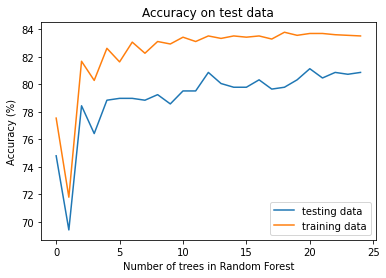

In [17]:
# Plotting the resulting accuracies

plt.plot(np.arange(25), test, label='testing data')
plt.plot(np.arange(25), train, label='training data')
plt.xlabel("Number of trees in Random Forest")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy on test data")
plt.legend()

It seems like using a random forest to predict the primary color can be quite effective

In [18]:
# Picking a good random forest model

print("Index of random forest with highest accuracy: " + str(list(test).index(np.max(test))+1))
# Taking n_estimators = 21 yields the highest accuracy on the test data (81.13208%)

rf = RandomForestClassifier(n_estimators=21, random_state=0).fit(X_train,y_train)
pred = rf.predict(X_test)
print("\nObservations that have been correctly classified:")
pd.DataFrame(primary_LE.inverse_transform(y_test[np.equal(pred,y_test)])).value_counts()
# We see that this Random Forest is able to correctly classify more than 1 class

Index of random forest with highest accuracy: 21

Observations that have been correctly classified:


Gray        566
Cinnamon     32
Black         4
dtype: int64

Therefore, a random forest with 21 trees is a good model for predicting a squirrel's primary fur color

## Predicting highlight fur color

In [19]:
print("HIGHLIGHT COLOR PREDICTION")

X_train, X_test, y_train, y_test = train_test_split(model_input,hColor, test_size=0.25, random_state=0) 
print("\nMLR")
# Multiclass Logistic Regression
hColor_MLR= MLR(X_train, y_train,4)
test_accuracy(hColor_MLR, X_test, y_test)

print("\nMLP")
# Multi-layer perceptron
hColor_MLP = MLP(X_train, y_train,4)
test_accuracy(hColor_MLP, X_test, y_test)

print("\nSVM")
# Support-vector machine
hColor_SVM = SVM(X_train, y_train,4)
test_accuracy(hColor_SVM, X_test, y_test)

print("\nDecision tree")
# Decision tree
hColor_DTC = DTC(X_train, y_train,4)
test_accuracy(hColor_DTC, X_test, y_test)

print("\nRandom Forest")
# Random Forest
hColor_RF = SVM(X_train, y_train,4)
test_accuracy(hColor_RF, X_test, y_test);

HIGHLIGHT COLOR PREDICTION

MLR
Accuracy of model on training set by 4-fold cross-validation: 34.41201%
Accuracy of model on test set: 34.23181%

MLP
Accuracy of model on training set by 4-fold cross-validation: 34.90573%
Accuracy of model on test set: 34.23181%

SVM
Accuracy of model on training set by 4-fold cross-validation: 34.90573%
Accuracy of model on test set: 34.23181%

Decision tree
Accuracy of model on training set by 4-fold cross-validation: 42.76773%
Accuracy of model on test set: 44.47439%

Random Forest
Accuracy of model on training set by 4-fold cross-validation: 34.90573%
Accuracy of model on test set: 34.23181%


In [20]:
# Once again, it seems like certain models are obtaining the same accuracy scores on the test data

# Comparing the predictions of the models with similar computed accuracies  
print("All MLR predictions = MLP predictions? " + str(np.array_equiv(hColor_MLR.predict(X_test), hColor_MLP.predict(X_test))))
print("All SVM predictions = RF predictions? " + str(np.array_equiv(pColor_SVM.predict(X_test), pColor_RF.predict(X_test))))

All MLR predictions = MLP predictions? True
All SVM predictions = RF predictions? True


However, this is not an imbalance of classes issue

In [21]:
df['Highlight Fur Color'].value_counts()

None                      1031
Cinnamon                   767
White                      585
Cinnamon, White            268
Gray                       170
Gray, White                 59
Black                       34
Black, Cinnamon, White      32
Black, White                10
Black, Cinnamon              9
Gray, Black                  3
Name: Highlight Fur Color, dtype: int64

### Attempting to make a better model for predicting highlight color
Using random forests

In [22]:
test = np.empty(25)
train = np.empty(25)
for i in range(1,26):
    print("Number of trees in Random Forest: %i"%i)
    rf = RandomForestClassifier(n_estimators=i, random_state=0).fit(X_train,y_train)
    train[i-1] = kFold_CV(rf,X_train, y_train)
    test[i-1] = test_accuracy(rf, X_test, y_test)

Number of trees in Random Forest: 1
Accuracy of model on training set by 10-fold cross-validation: 41.64687%
Accuracy of model on test set: 44.20485%
Number of trees in Random Forest: 2
Accuracy of model on training set by 10-fold cross-validation: 41.19763%
Accuracy of model on test set: 41.10512%
Number of trees in Random Forest: 3
Accuracy of model on training set by 10-fold cross-validation: 44.11586%
Accuracy of model on test set: 45.01348%
Number of trees in Random Forest: 4
Accuracy of model on training set by 10-fold cross-validation: 47.12600%
Accuracy of model on test set: 46.09164%
Number of trees in Random Forest: 5
Accuracy of model on training set by 10-fold cross-validation: 46.85796%
Accuracy of model on test set: 47.03504%
Number of trees in Random Forest: 6
Accuracy of model on training set by 10-fold cross-validation: 48.20608%
Accuracy of model on test set: 47.16981%
Number of trees in Random Forest: 7
Accuracy of model on training set by 10-fold cross-validation: 4


The random forest that classified the most observations for highlight color correctly: the one with 16 trees (48.51752% classification accuracy)


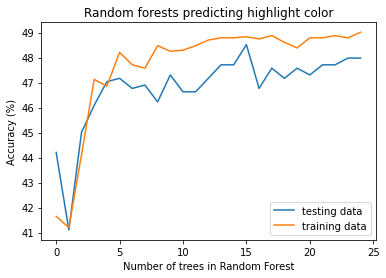

In [23]:
plt.plot(np.arange(25), test, label='testing data')
plt.plot(np.arange(25), train, label='training data')
plt.xlabel("Number of trees in Random Forest")
plt.ylabel("Accuracy (%)")
plt.title("Random forests predicting highlight color")
plt.legend()

print("\nThe random forest that classified the most observations for highlight color correctly: the one with " 
      + str(list(test).index(np.max(test))+1)+ " trees (%.5f%% classification accuracy)" % np.max(test))

We see that none of the resulting accuracies exceed 50%. However, the random forest with 16 trees did acheive a better result than the initial random forest above.

#### Attempt to make a model for joint predictions for primary and highlight colors 

In [24]:
labels = np.column_stack((pColor,hColor))
X_train, X_test, y_train, y_test = train_test_split(model_input,labels, test_size=0.25, random_state=0) 

max_correct_PH = 0
index = 0
pTrain = np.empty(20)
hTrain = np.empty(20)
pTest = np.empty(20)
hTest = np.empty(20)

for i in range(1,21):
    print("Number of trees in Random Forest: %i"%i)
    rf_model = RandomForestClassifier(n_estimators=i,random_state=0).fit(X_train,y_train)
    pred_train = rf_model.predict(X_train)
    pred_test = rf_model.predict(X_test)
    print("Training: ")
    pTrain[i-1] = accuracy_score(y_train[:,0], pred_train[:,0])*100
    hTrain[i-1] = accuracy_score(y_train[:,1], pred_train[:,1])*100
    print("main color: %.5f%%" %(pTrain[i-1]))
    print("highlight color: %.5f%%" %(hTrain[i-1]))
    print("Testing: ")
    correct_primary_test = y_test[[np.equal(y_test[i,0], pred_test[i,0]) for i in range(y_test.shape[0])]]
    correct_highlight_test = y_test[[np.equal(y_test[i,1], pred_test[i,1]) for i in range(y_test.shape[0])]]
    pTest[i-1] = accuracy_score(y_test[:,0], pred_test[:,0])*100
    hTest[i-1] = accuracy_score(y_test[:,1], pred_test[:,1])*100
    print("main color: %.5f%%" %(pTest[i-1]))
    print("highlight color: %.5f%%" %(hTest[i-1]))
    print("Number of correctly classified squirrels for primary color: %i"%(correct_primary_test.shape[0]))
    print(pd.DataFrame(primary_LE.inverse_transform(correct_primary_test[:,0])).value_counts())
    print("Number of correctly classified squirrels for highlight color: %i"%(correct_highlight_test.shape[0]))
    print(pd.DataFrame(highlight_LE.inverse_transform(correct_highlight_test[:,1])).value_counts())
    correct_PH = y_test[[np.equal(y_test[i,0], pred_test[i,0]) for i in range(y_test.shape[0])] 
                        and [np.equal(y_test[i,1], pred_test[i,1]) for i in range(y_test.shape[0])]].shape[0]
    if correct_PH > max_correct_PH:
        max_correct_PH = correct_PH
        index = i
    print("Number of squirrels correctly classified for both primary and highlight colors: %i" %(correct_PH))
    print()

Number of trees in Random Forest: 1
Training: 
main color: 91.64420%
highlight color: 78.79605%
Testing: 
main color: 74.93261%
highlight color: 40.56604%
Number of correctly classified squirrels for primary color: 556
Gray        523
Cinnamon     28
Black         5
dtype: int64
Number of correctly classified squirrels for highlight color: 301
None                      144
Cinnamon                   69
White                      57
Cinnamon, White            20
Gray                        4
Gray, White                 4
Black, Cinnamon, White      2
Black                       1
dtype: int64
Number of squirrels correctly classified for both primary and highlight colors: 301

Number of trees in Random Forest: 2
Training: 
main color: 89.93711%
highlight color: 78.93082%
Testing: 
main color: 69.13747%
highlight color: 39.35310%
Number of correctly classified squirrels for primary color: 513
Gray        463
Cinnamon     41
Black         9
dtype: int64
Number of correctly classified squir

Training: 
main color: 99.37107%
highlight color: 98.33783%
Testing: 
main color: 79.64960%
highlight color: 45.82210%
Number of correctly classified squirrels for primary color: 591
Gray        557
Cinnamon     31
Black         3
dtype: int64
Number of correctly classified squirrels for highlight color: 340
None                      170
Cinnamon                   82
White                      63
Cinnamon, White            14
Gray, White                 5
Gray                        3
Black                       2
Black, Cinnamon, White      1
dtype: int64
Number of squirrels correctly classified for both primary and highlight colors: 340

Number of trees in Random Forest: 15
Training: 
main color: 99.32615%
highlight color: 98.74214%
Testing: 
main color: 80.05391%
highlight color: 45.95687%
Number of correctly classified squirrels for primary color: 594
Gray        560
Cinnamon     30
Black         4
dtype: int64
Number of correctly classified squirrels for highlight color: 341
None 

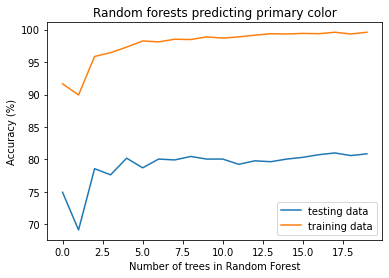

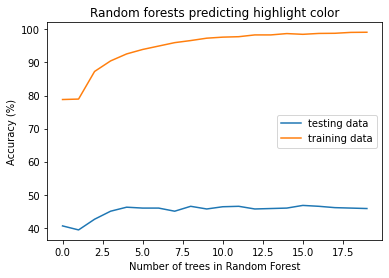

In [25]:
plt.plot(np.arange(20), pTest, label='testing data')
plt.plot(np.arange(20), pTrain, label='training data')
plt.xlabel("Number of trees in Random Forest")
plt.ylabel("Accuracy (%)")
plt.title("Random forests predicting primary color")
plt.legend()

plt.figure()
plt.plot(np.arange(20), hTest, label='testing data')
plt.plot(np.arange(20), hTrain, label='training data')
plt.xlabel("Number of trees in Random Forest")
plt.ylabel("Accuracy (%)")
plt.title("Random forests predicting highlight color")
plt.legend()

We see that the models are making different predictions and these predictions are not all from the same class. None of the models managed to improve the classification accuracy for the highlight color though. 

In [26]:
print("The random forest that classified the most observations for primary color correctly: the one with " 
      + str(list(pTest).index(np.max(pTest))+1) + " trees (%.5f%% classification accuracy)" % np.max(pTest))

print("\nThe random forest that classified the most observations for highlight color correctly: the one with " 
      + str(list(hTest).index(np.max(hTest))+1) + " trees (%.5f%% classification accuracy)" % np.max(hTest))

print("\nThe random forest that classified the most observations for both primary and highlight colors correctly: \nthe one with %i trees (%i/%i observations)"
      %(index,max_correct_PH,y_test.shape[0]))

The random forest that classified the most observations for primary color correctly: the one with 18 trees (80.99730% classification accuracy)

The random forest that classified the most observations for highlight color correctly: the one with 16 trees (46.76550% classification accuracy)

The random forest that classified the most observations for both primary and highlight colors correctly: 
the one with 16 trees (347/742 observations)
